# word2vect type embedding from scratch. Exp:8

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
sample_data = [
    ["I Love Machine Learning"], # 1 sent per doc
    ["deep learning is amazing"],
    ["tensorflow is an open source library"],
]

In [3]:
corpus = sample_data

# Vocabulary Building and Word_INDEX_MAPPING

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sen[0] for sen in corpus)
total_words = len(tokenizer.word_index)

In [5]:
word_ids = tokenizer.word_index
print(word_ids) # Set function creates a random list of contents

{'learning': 1, 'is': 2, 'i': 3, 'love': 4, 'machine': 5, 'deep': 6, 'amazing': 7, 'tensorflow': 8, 'an': 9, 'open': 10, 'source': 11, 'library': 12}


In [6]:
idx_word = {index: word for word, index in word_ids.items()}

In [7]:
idx_word

{1: 'learning',
 2: 'is',
 3: 'i',
 4: 'love',
 5: 'machine',
 6: 'deep',
 7: 'amazing',
 8: 'tensorflow',
 9: 'an',
 10: 'open',
 11: 'source',
 12: 'library'}

# Define Hyperparameters for Training the Embedding

In [14]:
embedding_size = 64 # GPT2 512 GPT 4 786 1024 Vectors/numbers per word
lr = 0.01
epochs = 100
window_len = 2 # N Gram 

# Function to generate_training_data using skip_gram Architecture
# The training objective of the skip-gram model is to maximize the probability of predicting context words given the target word.

# SKIPGRAM MODEL: Input is A Target Word -- GIVEN
# Predict the CONTEXT Words -- Output or Label

# Example: I love machine learning
# Select a context window : ex 2
## For the target word "LOVE"(input) what are my context words ["I","Machine"]

# Question is creating training data for the ANN
# SKIPGRAM Model ["love":"I"]
# ["love":"machine"]

# We are creating a ['Target'(INPUT) :'Context'(LABELS)] PAIRS

In [15]:
tokenizer.index_word[1]

'learning'

In [16]:
tokenizer.fit_on_texts(sen[0] for sen in corpus)
sequences = [tokenizer.texts_to_sequences(sentence) for sentence in corpus]
word_index = tokenizer.word_index
tokenized_sentences = [[tokenizer.index_word[idx] for idx in sequence[0]] for sequence in sequences]

In [17]:
tokenized_sentences

[['i', 'love', 'machine', 'learning'],
 ['deep', 'learning', 'is', 'amazing'],
 ['tensorflow', 'is', 'an', 'open', 'source', 'library']]

In [18]:
def generate_train_data(tokenized_sentences,window_len):
    train_data = [] # Create an empty matrix to store the pairs
    for sen in tokenized_sentences:
        for i, target_word in enumerate(sen):
            # All words are target words
            start = max(0, i- window_len)  # For i = 0, Start = 0
            end = min(len(sen),i+window_len+1) # End is = 3
            # Assign context words j=0, i=0, select j=1,2,3 as context_words
            context_words = [sen[j] for j in range(start,end) if j != i]
            for context_word in context_words:
                train_data.append((target_word,context_word))
    return train_data

In [19]:
for sen in tokenized_sentences:
        for i, target_word in enumerate(sen):
            print(i,target_word)

0 i
1 love
2 machine
3 learning
0 deep
1 learning
2 is
3 amazing
0 tensorflow
1 is
2 an
3 open
4 source
5 library


In [21]:
for sen in tokenized_sentences:
        for i, target_word in enumerate(sen):
            # All words are target words
            start = max(0, i - window_len)
            end = min(len(sen),i+window_len+1)
            print(i,i-window_len,start,len(sen),end,target_word)

0 -2 0 4 3 i
1 -1 0 4 4 love
2 0 0 4 4 machine
3 1 1 4 4 learning
0 -2 0 4 3 deep
1 -1 0 4 4 learning
2 0 0 4 4 is
3 1 1 4 4 amazing
0 -2 0 6 3 tensorflow
1 -1 0 6 4 is
2 0 0 6 5 an
3 1 1 6 6 open
4 2 2 6 6 source
5 3 3 6 6 library


In [22]:
for sen in tokenized_sentences:
        for i, target_word in enumerate(sen):
            # All words are target words
            start = max(0, i - window_len)
            end = min(len(sen),i+window_len+1)
            context_words = [sen[j] for j in range(start,end) if j != i]
            print(target_word,context_words)

i ['love', 'machine']
love ['i', 'machine', 'learning']
machine ['i', 'love', 'learning']
learning ['love', 'machine']
deep ['learning', 'is']
learning ['deep', 'is', 'amazing']
is ['deep', 'learning', 'amazing']
amazing ['learning', 'is']
tensorflow ['is', 'an']
is ['tensorflow', 'an', 'open']
an ['tensorflow', 'is', 'open', 'source']
open ['is', 'an', 'source', 'library']
source ['an', 'open', 'library']
library ['open', 'source']


In [23]:
train_da = []
for sen in tokenized_sentences:
        for i, target_word in enumerate(sen):
            # All words are target words
            start = max(0, i - window_len)
            end = min(len(sen),i+window_len+1)
            context_words = [sen[j] for j in range(start,end) if j != i]
            #print(target_word,context_words)
            for context_word in context_words:
                train_da.append((target_word,context_word))
print(train_da)

[('i', 'love'), ('i', 'machine'), ('love', 'i'), ('love', 'machine'), ('love', 'learning'), ('machine', 'i'), ('machine', 'love'), ('machine', 'learning'), ('learning', 'love'), ('learning', 'machine'), ('deep', 'learning'), ('deep', 'is'), ('learning', 'deep'), ('learning', 'is'), ('learning', 'amazing'), ('is', 'deep'), ('is', 'learning'), ('is', 'amazing'), ('amazing', 'learning'), ('amazing', 'is'), ('tensorflow', 'is'), ('tensorflow', 'an'), ('is', 'tensorflow'), ('is', 'an'), ('is', 'open'), ('an', 'tensorflow'), ('an', 'is'), ('an', 'open'), ('an', 'source'), ('open', 'is'), ('open', 'an'), ('open', 'source'), ('open', 'library'), ('source', 'an'), ('source', 'open'), ('source', 'library'), ('library', 'open'), ('library', 'source')]


# Now lets generate training data from tokenized texts of corpus

In [24]:
training_data = generate_train_data(tokenized_sentences, window_len)

In [25]:
training_data # BOW : Bag of Words

[('i', 'love'),
 ('i', 'machine'),
 ('love', 'i'),
 ('love', 'machine'),
 ('love', 'learning'),
 ('machine', 'i'),
 ('machine', 'love'),
 ('machine', 'learning'),
 ('learning', 'love'),
 ('learning', 'machine'),
 ('deep', 'learning'),
 ('deep', 'is'),
 ('learning', 'deep'),
 ('learning', 'is'),
 ('learning', 'amazing'),
 ('is', 'deep'),
 ('is', 'learning'),
 ('is', 'amazing'),
 ('amazing', 'learning'),
 ('amazing', 'is'),
 ('tensorflow', 'is'),
 ('tensorflow', 'an'),
 ('is', 'tensorflow'),
 ('is', 'an'),
 ('is', 'open'),
 ('an', 'tensorflow'),
 ('an', 'is'),
 ('an', 'open'),
 ('an', 'source'),
 ('open', 'is'),
 ('open', 'an'),
 ('open', 'source'),
 ('open', 'library'),
 ('source', 'an'),
 ('source', 'open'),
 ('source', 'library'),
 ('library', 'open'),
 ('library', 'source')]

# Initialize word Vectors: How much size of the vector is needed to represent each word

In [26]:
total_words

12

In [27]:
embedding_size

64

In [28]:
word_vectors_initial = np.random.rand(total_words,embedding_size)
word_vectors_initial

array([[0.78474113, 0.69647362, 0.45297264, 0.3407732 , 0.2072794 ,
        0.87331461, 0.59204793, 0.19002221, 0.4143138 , 0.91926521,
        0.16748008, 0.17882696, 0.34227008, 0.46433488, 0.05010828,
        0.30829075, 0.62225214, 0.72422729, 0.64680723, 0.51064376,
        0.57227215, 0.68390596, 0.08554429, 0.63037013, 0.61758136,
        0.79268021, 0.41601384, 0.6247169 , 0.88084463, 0.31370939,
        0.73975632, 0.97716161, 0.54040623, 0.83599555, 0.59551385,
        0.35643996, 0.10330792, 0.35509632, 0.86761287, 0.46841428,
        0.20247421, 0.08123388, 0.35983261, 0.14999602, 0.16780802,
        0.53621477, 0.14128094, 0.5499283 , 0.7346229 , 0.16168394,
        0.4519764 , 0.14130805, 0.50347439, 0.75996628, 0.68096809,
        0.94022686, 0.7432637 , 0.11731892, 0.78097263, 0.36909319,
        0.18405044, 0.25345549, 0.20994637, 0.39685406],
       [0.09596274, 0.41935489, 0.37650661, 0.53141757, 0.20964124,
        0.30889166, 0.96188517, 0.34725524, 0.4329797 , 0.3

# Each word vector is of length 64 for all 12 words

# Lets train the simple ANN model we saw in last MLP Lab

# Step_1: Convert the data pairs into number -- Mostly Indexes

In [29]:
vocab = set(word for sentence in tokenized_sentences for word in sentence)
word2index = {word: index for index, word in enumerate(vocab)}
index2word = {index: word for word, index in word2index.items()}
vocab_size = len(vocab)

In [30]:
word2index,index2word

({'source': 0,
  'amazing': 1,
  'i': 2,
  'is': 3,
  'love': 4,
  'tensorflow': 5,
  'machine': 6,
  'library': 7,
  'an': 8,
  'open': 9,
  'deep': 10,
  'learning': 11},
 {0: 'source',
  1: 'amazing',
  2: 'i',
  3: 'is',
  4: 'love',
  5: 'tensorflow',
  6: 'machine',
  7: 'library',
  8: 'an',
  9: 'open',
  10: 'deep',
  11: 'learning'})

In [31]:
for target_word,context_word in training_data:
    target_idx = word2index[target_word]
    context_idx = word2index[context_word]
    print(target_idx,context_idx)

2 4
2 6
4 2
4 6
4 11
6 2
6 4
6 11
11 4
11 6
10 11
10 3
11 10
11 3
11 1
3 10
3 11
3 1
1 11
1 3
5 3
5 8
3 5
3 8
3 9
8 5
8 3
8 9
8 0
9 3
9 8
9 0
9 7
0 8
0 9
0 7
7 9
7 0


# A simple ANN model Y_predict = X_input*Weights+Bias
# In Forward Pass

In [32]:
X_input = word_vectors_initial[target_idx]
Y_predict = word_vectors_initial[context_idx]

In [33]:
for target_word,context_word in training_data:
    target_idx = word2index[target_word]
    context_idx = word2index[context_word]
    # Forward Pass
    input_vectors = word_vectors_initial[target_idx]
    output_vectors = word_vectors_initial[context_idx]
    #print(input_vectors.shape)
    dot_product = np.dot(input_vectors,output_vectors)
    # pass it through activation function
    pred_vector = 1.0/(1+np.exp(-dot_product))
    print(pred_vector)

0.9999999984296215
0.9999999994587672
0.9999999984296215
0.9999999782805522
0.9999999480125503
0.9999999994587672
0.9999999782805522
0.9999999921460302
0.9999999480125503
0.9999999921460302
0.9999994651805955
0.9999985527517139
0.9999994651805955
0.9999999399820407
0.9999996949600423
0.9999985527517139
0.9999999399820407
0.9999994793876364
0.9999996949600423
0.9999994793876364
0.9999999551965093
0.9999998138446666
0.9999999551965093
0.9999994030624193
0.9999999703056559
0.9999998138446666
0.9999994030624193
0.9999996852635038
0.9999986944999618
0.9999999703056559
0.9999996852635038
0.99999975879535
0.9999999935794814
0.9999986944999618
0.99999975879535
0.9999999593417511
0.9999999935794814
0.9999999593417511


# Why multiply input and output vectors: To find the relation between them

# Now calculate the loss between the predicted vectors and actual vectors

In [34]:
total_loss =0.0
for target_word,context_word in training_data:
    target_idx = word2index[target_word]
    context_idx = word2index[context_word]
    # Forward Pass
    input_vectors = word_vectors_initial[target_idx]
    output_vectors = word_vectors_initial[context_idx]
    #print(input_vectors.shape)
    dot_product = np.dot(input_vectors,output_vectors)
    # pass it through activation function
    pred_vector = 1.0/(1+np.exp(-dot_product))

    # Loss
    loss_vector = -np.log(pred_vector)
    total_loss += loss_vector
    print(total_loss)

1.570378495142219e-09
2.1116113316150294e-09
3.6819898267572484e-09
2.5401437858456028e-08
7.738888888829576e-08
7.793012172476857e-08
9.964956975646736e-08
1.0750353959515704e-07
1.5949099062499676e-07
1.6734496046368644e-07
7.021645080203337e-07
2.149413841386799e-06
2.6842333889434465e-06
2.7442513500136563e-06
3.0492913542759167e-06
4.496540687642382e-06
4.5565586487125915e-06
5.077171147783864e-06
5.382211152046124e-06
5.902823651117396e-06
5.947627142816317e-06
6.133782493513631e-06
6.178585985212552e-06
6.77552374407898e-06
6.805218088614579e-06
6.991373439311893e-06
7.588311198178322e-06
7.903047743906483e-06
9.208548634256925e-06
9.238242978792524e-06
9.552979524520686e-06
9.794184203641611e-06
9.80060472222348e-06
1.1106105612573921e-05
1.1347310291694846e-05
1.138796854140017e-05
1.1394389059982039e-05
1.1435047309687363e-05


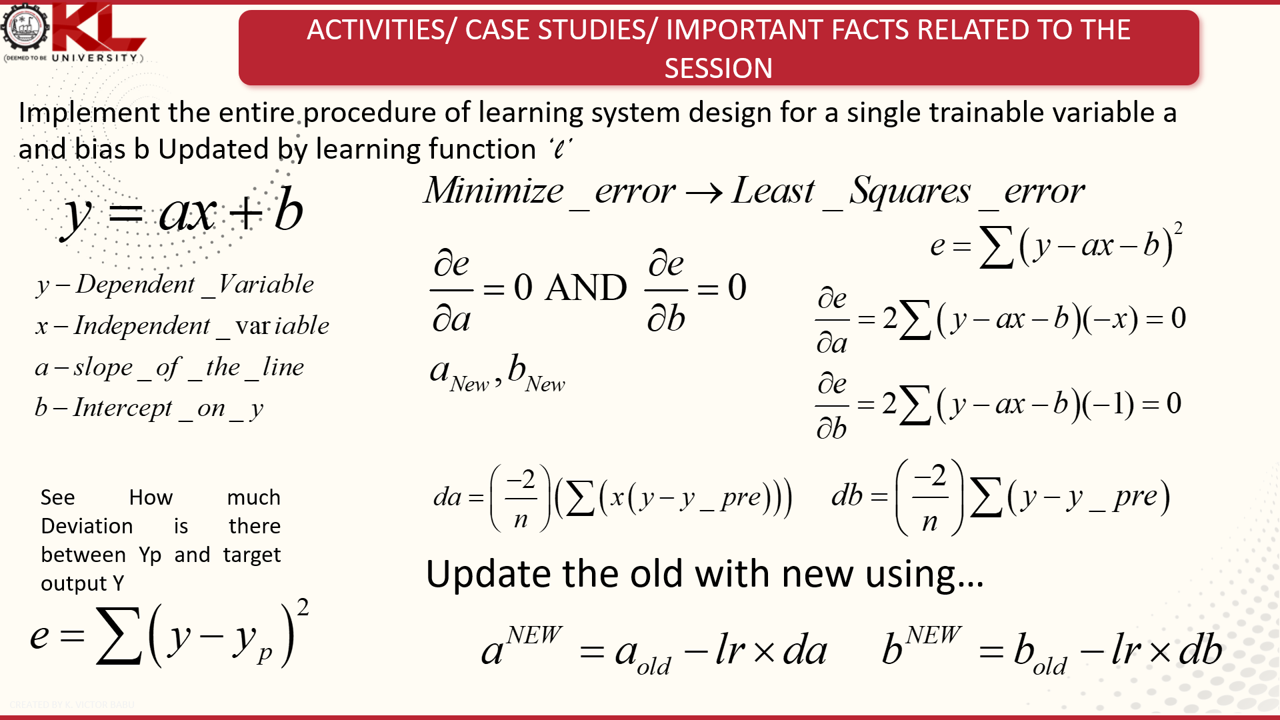

In [ ]:
for epoch in range(epochs):
    total_loss = 0.0
    np.random.shuffle(training_data)
    for target_word,context_word in training_data:
        target_idx = word2index[target_word]
        context_idx = word2index[context_word]
        # Forward Pass
        input_vectors = word_vectors_initial[target_idx]
        output_vectors = word_vectors_initial[context_idx]
        #print(input_vectors.shape)
        dot_product = np.dot(input_vectors,output_vectors)
        # pass it through activation function
        pred_vector = 1.0/(1+np.exp(-dot_product))

        # Loss
        loss_vector = -np.log(pred_vector)
        total_loss += loss_vector

        # Backpropagation
        b_loss = pred_vector - 1
        b_pred = pred_vector*(1 - pred_vector)
        b_output_vector = b_loss * b_pred * input_vectors
        b_input_vector = b_loss * b_pred * output_vectors

        # Update the word vectors
        word_vectors_initial[target_idx] -= lr * b_input_vector
        word_vectors_initial[context_idx] -= lr * b_output_vector

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss}")

In [ ]:
# Print word embeddings
print("Word Embeddings:")
for word, idx in word2index.items():
    print(word, word_vectors_initial[idx])